In [1]:
import pandas as pd
import seaborn as sns


In [2]:
sportsstats = pd.read_csv('/Project/athlete_events.csv',index_col = 0)
noc=pd.read_csv('/Project/noc_regions.csv',index_col = 0)


In [3]:
sportsstats.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc.head()


,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN


In [5]:
import sqlalchemy

In [6]:
engine=sqlalchemy.create_engine('sqlite:///athlete.db')

In [7]:
%load_ext sql

In [8]:
%reload_ext sql

In [9]:
%sql sqlite:///athlete.db

In [10]:
# %%sql

# CREATE TABLE athlete_data(ID number(10), Name char(30), Sex char(3), Age number(3), Height number(4), Weight number(4), Team vachar(30), NOC varchar(10), Games char(30), Year number(4), Season varchar(15), City char(30),Sport varchar(20),Event varchar(30),Medal varchar(10));

In [11]:
%%sql
drop table athlete_data

 * sqlite:///athlete.db
Done.


[]

In [12]:
sportsstats.to_sql('athlete_data',engine)

271116

In [13]:
%%sql
pragma table_info('athlete_data')

 * sqlite:///athlete.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,BIGINT,0,None,0
1,Name,TEXT,0,None,0
2,Sex,TEXT,0,None,0
3,Age,FLOAT,0,None,0
4,Height,FLOAT,0,None,0
5,Weight,FLOAT,0,None,0
6,Team,TEXT,0,None,0
7,NOC,TEXT,0,None,0
8,Games,TEXT,0,None,0
9,Year,BIGINT,0,None,0


In [57]:
%%sql
SELECT * from athlete_noc_combined_csv limit 4

 * sqlite:///athlete.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [15]:
# %%sql 
# CREATE TABLE athlete_data20 AS SELECT *, ROW_NUMBER() OVER (PARTITION BY ID ORDER BY ID) as row_num FROM athlete_data 



In [16]:
# %%sql
# select * from athlete_data20 limit 10;


In [17]:
# %%sql 
# DELETE FROM athlete_data20 WHERE row_num > 1;

In [18]:
# %%sql 
# alter table athlete_data20 drop column row_num; 

In [19]:
# %%sql
# create table athlete_data as select * from athlete_data20

In [20]:
# %%sql
# SELECT * from athlete_data20 limit 10

In [21]:
# %%sql
# alter table athlete_data20 add `Avg. Weight for NULL Values` Number(5)


In [22]:
# %%sql
# alter table athlete_data20 add `Avg. Height for NULL Values` number(5)


In [23]:
# %%sql
# update athlete_data20 set `Avg. Weight for NULL Values`= 85.5 where Weight is null;
# update athlete_data20 set `Avg. Height for NULL Values`=180.0 where Height is null;

In [24]:
# %%sql
# SELECT * from athlete_data20 limit 5

In [25]:
# noc.to_sql('noc_data',engine)

In [26]:
# %%sql
# pragma table_info('noc_data')

In [27]:
# %%sql
# SELECT * from noc_data limit 10

In [28]:
# %%sql
# select * from athlete_data20 where ID is null 


In [29]:
# %%sql
# ALTER TABLE athelete_data20 ALTER COLUMN ID int NOT NULL


In [30]:
# %%sql
# pragma table_info('athlete_data20')

In [31]:
# %%sql

# CREATE TABLE athlete_data(ID number(10), Name char(30), Sex char(3), Age number(3), Height number(4), Weight number(4), Team vachar(30), NOC varchar(10), Games char(30), Year number(4), Season varchar(15), City char(30),Sport varchar(20),Event varchar(30),Medal varchar(10),`Avg. Weight for NULL Values` Number(5),`Avg. Height for NULL Values` Number(5),primary key(ID), FOREIGN KEY(NOC) REFERENCES noc_data(NOC));

In [32]:
# %%sql 
# drop table athlete_data

In [33]:
# %%sql 
# INSERT INTO athlete_data SELECT * FROM athlete_data20 

In [34]:
# %%sql
# select * from athlete_data limit 5 


In [35]:
# %%sql
# pragma table_info('athlete_data')

In [36]:
# %%sql
# select * from athlete_data limit 5 


In [37]:
# %%sql
# select * from noc_data limit 5 

In [38]:
# %%sql
# select a.*,n.notes from athlete_data as a left join noc_data as n on a.NOC=n.NOC LIMIT 50

In [39]:
# %%sql 
# UPDATE noc_data set notes='AVG.'

In [40]:
# %%sql
# CREATE TABLE joined_data_athlete AS select a.*,n.notes from athlete_data as a left join noc_data as n on a.NOC=n.NOC

In [41]:
%%sql
select * from joined_data_athlete limit 5

In [42]:
athlete_noc_combined_csv=pd.read_csv('/Project/athlete_data.csv',index_col = 0)


In [43]:
athlete_noc_combined_csv

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Avg. Weight for NULL Values,Avg. Height for NULL Values
ID,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,NaN,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,NaN,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,85.5,180.0
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,85.5,180.0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,NaN,NaN
135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,NaN,NaN
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,NaN,NaN


In [44]:
import matplotlib.pyplot as plt

In [45]:
athlete_data = pd.read_csv('/Project/athlete_events.csv',index_col = 0)


In [46]:
# sns.barplot(x="Sex",y="Height",data=athlete_noc_combined_csv,hue="Sex")
# plt.show()

<AxesSubplot:xlabel='Sport', ylabel='count'>

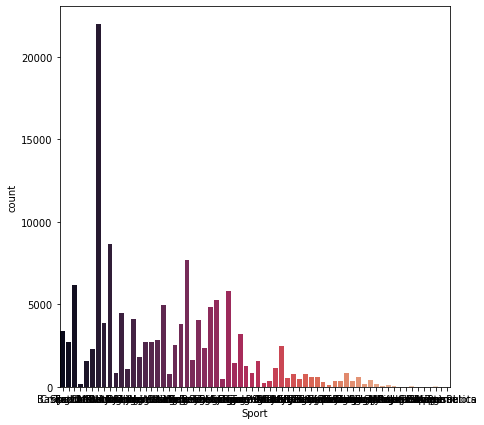

In [47]:
plt.figure(figsize=(7,7))
sns.countplot(x="Sport",data=athlete_noc_combined_csv,palette="rocket")

<AxesSubplot:xlabel='Sex', ylabel='count'>

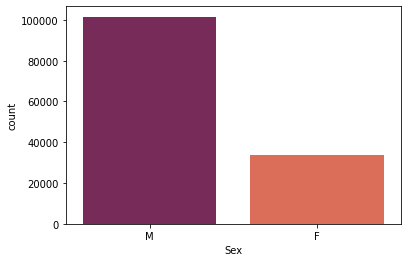

In [48]:
# plt.figure(figsize=(10,11))
sns.countplot(x="Sex",data=athlete_noc_combined_csv,palette="rocket")

<AxesSubplot:xlabel='Medal', ylabel='Age'>

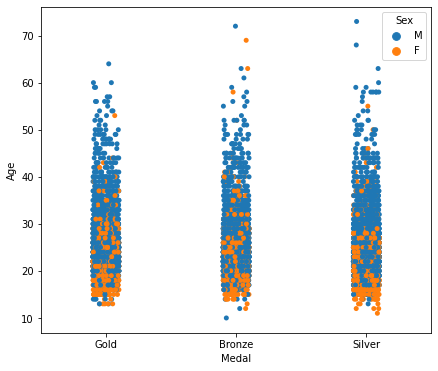

In [49]:
plt.figure(figsize=(7,6))
sns.stripplot(x=athlete_noc_combined_csv.Medal,y=athlete_noc_combined_csv.Age,hue=athlete_noc_combined_csv.Sex)

<AxesSubplot:xlabel='Medal', ylabel='count'>

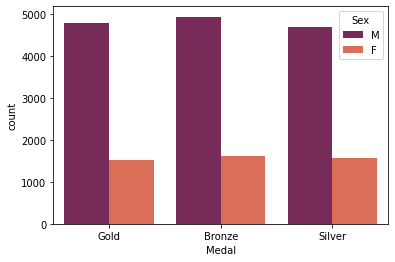

In [50]:
sns.countplot(x="Medal",data=athlete_noc_combined_csv,hue="Sex",palette="rocket")

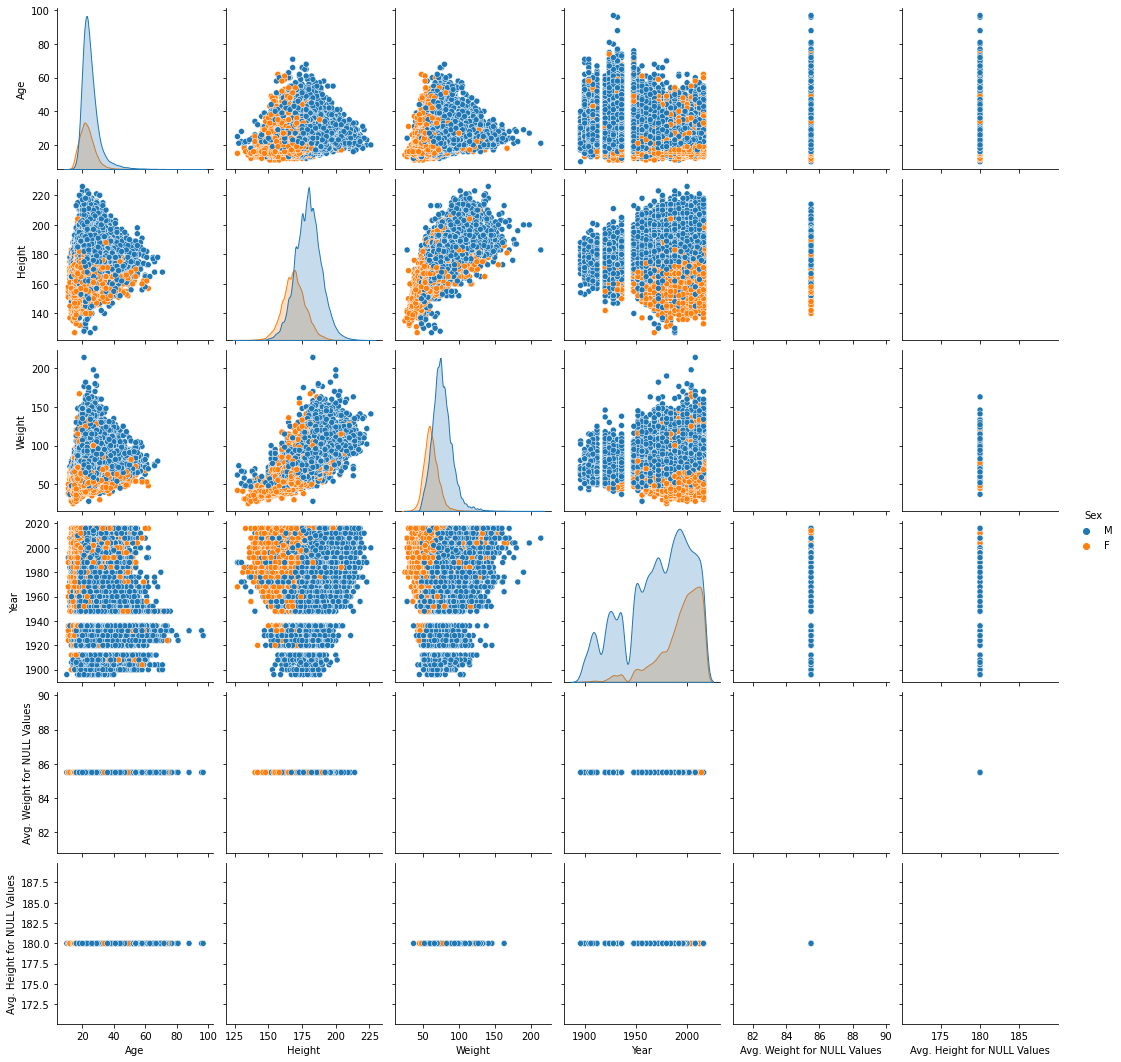

In [51]:
sns.pairplot(athlete_noc_combined_csv,hue="Sex")

In [52]:
athlete_noc_combined_csv.describe()

,Age,Height,Weight,Year,Avg. Weight for NULL Values,Avg. Height for NULL Values
count,129203.000000,101655.000000,100686.000000,135571.000000,34885.0,33916.0
mean,24.447977,176.315410,71.961772,1976.993870,85.5,180.0
std,5.693059,10.369214,14.563643,30.282684,0.0,0.0
min,10.000000,127.000000,25.000000,1896.000000,85.5,180.0
25%,21.000000,170.000000,62.000000,1960.000000,85.5,180.0
50%,23.000000,176.000000,70.000000,1984.000000,85.5,180.0
75%,27.000000,183.000000,80.000000,2000.000000,85.5,180.0
max,97.000000,226.000000,214.000000,2016.000000,85.5,180.0


In [53]:
sportsstats.to_sql('athlete_noc_combined_csv',engine)


271116

In [59]:
%%sql
SELECT * from athlete_noc_combined_csv limit 20


 * sqlite:///athlete.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",None


In [61]:
stopwords=['None']
import pandas as pd
sw_df=pd.DataFrame(stopwords,columns=['stopwords'])

In [62]:
sw_df

,stopwords
0,None


In [ ]:
from collections import Counter
no_sw=athlete_noc_combined_csv.Medal